<h1><center>Can the skier manage the slope?</center></h1>

###### Computational Physics Final Project
Author: Louisa Winkler

Professor: Dr. Kuchera


In [30]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='downhill.jpg' style='width: 500px;'></td><td><img src='uphill.jpg'></td></tr></table>"))

,


### Introduction
Skiing is one of my favorite sports, which is why I choose to do my final project related to this alpine sport. Ski slopes have very different shapes. The slope can have steep parts or even parts where you must go uphill a little. I have always asked myself, how fast do I have to be to make it up the hill. And assuming that I only go straight, what kind of slope shapes are doable to ski on.  I will animate the movement of a skier. The start velocity is determined by the user.  

### Can the kids make it up the hill?
In this essay we will compute whether a skier can slide the entire slope. We will compute the skier's speed and animate its performance on the slope. Here we see how me and my sister perform on a ski slope without thinking to much about physics. 

In [9]:
from IPython.display import Video
Video("warth_video.mp4", width = 500)

### Forces that contribute to the skier's performance
The factors that influence forces acting on the skier are air-resistance, friction with snow and of course gravitation. In the grafic we see the geometry of the skier on the slope. 


<img src="model_skier.png" width="240" height="240" align="center"/>

1. **Friction force**
$$
\begin{equation}
   F_{r}= \mu * F_{N} \text{ with } F_N=cos⁡(\theta)*m*g 
\end{equation}
$$


Where µ is the kinetic friction coefficient. For a decent snow condition: $\mu = 0.05$

2. **Air resistance**:
$$
\begin{equation}
F_{drag}=\frac{1}{2}*\rho*C*A*v^2 
\end{equation}
$$

Where rho is the air density: $\rho = 1.225\frac{kg}{m^3}$,  C is the drag coefficient: $C = 1.1$ and A is the surface area of the skier: $A = 0.5m$

3. **Gravitation force**
$$
\begin{equation}
F_{x}=sin(\theta) * m*g
\end{equation}
$$

The angle theta depends on the shape of the slope and can be calculated with its derivative. 
The velocity changes over time and can be calculated with Newton’s law: 

$$
\begin{equation}
F_{x} - F_{r} - F_{drag}=m*a=m*\frac{dv}{dt}=m*\frac{v_{i+1}-v_{i}}{Δt}
\end{equation}
$$


To impliment this equations in a python code, we solve the differential equation: 

$$
\begin{equation}
v_{i+1}=v_{i}+Δt (sin⁡(θ)*g-\frac{μF_N}{m}-\frac{1}{2m}*ρ*A*c*v_{i}^2 )
\end{equation}
$$

### The Test Slope
Here is the slope we want to test the skier on. We can vary the intital speed. Three examples with different speeds will follow. 


<IPython.core.display.Javascript object>

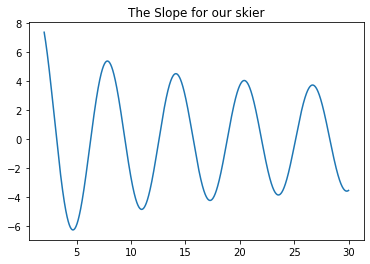

In [1]:
from code_skier_class import Skierc
from pylab import show, plot, xlabel, ylabel, title

sk = Skierc(3)
plot(sk.plot_slope()[0], sk.plot_slope()[1])
title("The Slope for our skier")
show()

### The Computation Method

To compute the skier's velocity we make use of the Runge Kutta method. The method is applied in the code below. 

In [ ]:
def runge_kutta(self):
        """ function applies RK4 
            Return: xpoints: list for x points of the skier
                    foffxpoints:list for y points of the skier
                    vpython will use the two lists to animate the skier 
                    on the slope
        """
        
        tpoints = []        # list for time points 
        vpoints = []        # list for velocity points
        xpoints = []        # list for x points
        foffxpoints = []    # list for y points of the skier
        vstart = self.vo    #vstart is start velocity entered by the user
        xstart = interval1  #start position x
        
        #solve DGL with Runge Kutta
        for t in np.arange(0,10000,h): 
            tpoints.append(t)
            vpoints.append(vstart)
            xpoints.append(xstart)
            foffxpoints.append(self.f(xstart))
            # calculate Runge kutta coefficients 
            k1 = self.v2(xstart, vstart, t, vstart, t)
            k2 = self.v2(xstart, vstart, t,  vstart + 0.5*k1, t+0.5*h)
            k3 = self.v2(xstart, vstart, t,  vstart + 0.5*k2, t+0.5*h)
            k4 = self.v2(xstart, vstart, t, vstart + k3, t+h)
            
            vnext = (k1+2*k2+2*k3+k4)/6
        
            #stop when v becomes zero (skier stops)
            if vnext < 0: 
                print('The skier stops at position x = ', format(xstart, '.2f'))
                break
            
            #traveled distance
            d = (vstart + vnext)/2 * h
            #convert with angle to next position x 
            dx = math.cos(self.theta(xstart))*d
            # the next position x ist the previous one with the traveled one 
            # under average velocity in a time h
            xnext = xstart + dx
            
            # if the skier does not stop on the slope, the slope is manageable
            if xnext >= interval2:
                print('The skier can manage the slope in the given interval')
                break 
        
            # define for next loop iteration the next velocity and position 
            # become the start values
            vstart = vnext
            xstart = xnext
            
        # determine the maximal speed
        v_max = format(max(vpoints), '.2f')
        print('the skier reaches a maximal speed of ', v_max, 'm/s')
        
        return xpoints, foffxpoints

#### 1. Example:
We choose an initial velocity of 5m/s and watch the skier on the slope below. 

In [2]:
""""Show the skier sliding the slope, example fast"""
import vpython as vp
skfast = Skierc(10)
skfast.animation()


The skier stops at position x =  13.95
the skier reaches a maximal speed of  16.29 m/s


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### 2. Example
In the second example we lower the intial velocity to 3m/s. The skier is animated in the cell below. We see that friction and drag stop the skier after before he can make it up the third hill. 

In [3]:
skslow = Skierc(3)
skslow.animation()

The skier stops at possition x =  19


<IPython.core.display.Javascript object>

#### 3. Example
In this example we choose a very high initial velocity. We can see that the skslope is managable for this skier. He is fast enough to make it up the last hill in our example interval. 

In [3]:
sk_professional = Skierc(20)
sk_professional.animation()

The skier can manage the slope in the given interval
the skier reaches a maximal speed of  24.10 m/s


<IPython.core.display.Javascript object>

#### 4. Example
Now it is your turn to define the start velocity! Run the cell, enter a start velocity and observe whether the skier can slide the entire slope.   

In [ ]:
v_start = int(input('Enter the skier\'s start speed'))
your_skier = Skierc(v_start)
your_skier.animation()

### Conclusion: 
With the python programm we are able to determine whether a skier can slide the entire slope. The animation shows us the position at which the skier comes to a stop.  It is also interesting to see the skier's maximal speed. 